In [1]:
#############################
# Exploratory data analysis #
#############################
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read cleaned train data:
df_cleaned = pd.read_csv('stroke_train_cleaned.csv')
# Remove unnamed column:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

# Check dataframe info.:
df_cleaned.info()
# Check number of missing values:
df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42512 entries, 0 to 42511
Data columns (total 11 columns):
gender               42512 non-null object
age                  42512 non-null float64
hypertension         42512 non-null object
heart_disease        42512 non-null object
ever_married         42512 non-null object
work_type            42512 non-null object
Residence_type       42512 non-null object
avg_glucose_level    42512 non-null float64
bmi                  42512 non-null float64
smoking_status       42512 non-null object
stroke               42512 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ MB


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [2]:
# Compute summary stat.: post-data cleansing 
df_stat_post = df_cleaned.describe().T
# Reorder columns order in summary dataframe
df_stat_post = df_stat_post[['count','min','max','mean','25%','50%','75%','std']]
# drop non-numerical and meaningless features
df_stat_post = df_stat_post.drop(['stroke'])
df_stat_post

,count,min,max,mean,25%,50%,75%,std
age,42512.0,0.08,82.00,42.152959,24.0000,44.000,60.0000,22.655211
avg_glucose_level,42512.0,55.00,291.05,104.066140,77.4975,91.485,111.7225,42.639886
bmi,42512.0,10.10,47.40,28.056657,23.3000,27.600,32.2000,6.774594


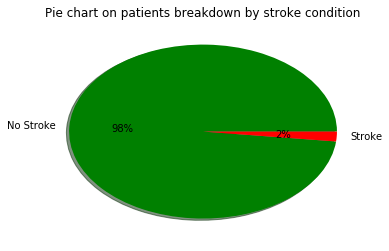

In [3]:
# Count frequencies and shows patients breakdown by stroke condition:
df_group_stroke = pd.DataFrame(df_cleaned.groupby('stroke')['stroke'].count())
df_group_stroke.columns = ['count']
plt.pie(df_group_stroke, labels=['No Stroke','Stroke'], autopct='%.0f%%', colors=['green','red'], shadow=True)
plt.title('Pie chart on patients breakdown by stroke condition')
plt.show()

In [4]:
# Count frequencies: demographic factors on a stroke condition
df_cleaned.groupby(['stroke','gender'])['gender'].count()

stroke  gender
0       Female    24597
        Male      17132
        Other        11
1       Female      425
        Male        347
Name: gender, dtype: int64

In [5]:
# Count frequencies: demographic factors on a stroke condition
df_grp_gender = pd.DataFrame(df_cleaned.groupby(['stroke','gender'])['gender'].count())
df_grp_gender.columns = ['count']
df_grp_marital = pd.DataFrame(df_cleaned.groupby(['stroke','ever_married'])['ever_married'].count().sort_values(ascending=False))
df_grp_marital.columns = ['count']
df_grp_residential = pd.DataFrame(df_cleaned.groupby(['stroke','Residence_type'])['Residence_type'].count().sort_values(ascending=False))
df_grp_residential.columns = ['count']
df_grp_worktype = pd.DataFrame(df_cleaned.groupby(['stroke','work_type'])['work_type'].count())
df_grp_worktype.columns = ['count']

# Count frequencies: health indiator factors on a stroke condition
df_grp_smoking = pd.DataFrame(df_cleaned.groupby(['stroke','smoking_status'])['smoking_status'].count().sort_values(ascending=False))
df_grp_smoking.columns = ['count']
df_grp_hypertension = pd.DataFrame(df_cleaned.groupby(['stroke','hypertension'])['hypertension'].count().sort_values(ascending=False))
df_grp_hypertension.columns = ['count']
df_grp_heart = pd.DataFrame(df_cleaned.groupby(['stroke','heart_disease'])['heart_disease'].count().sort_values(ascending=False))
df_grp_heart.columns = ['count']

In [6]:
# Proportion: only stroke patients by gender
df_grp_gender_1 = df_grp_gender.loc[1]
df_grp_gender_1['pct'] = (df_grp_gender_1/df_grp_gender_1.sum())*100
df_grp_gender_1['pct']

gender
Female    55.051813
Male      44.948187
Name: pct, dtype: float64

In [7]:
# Proportion: only stroke patients by marital status
df_grp_marital_1 = df_grp_marital.loc[1]
df_grp_marital_1['pct'] = (df_grp_marital_1/df_grp_marital_1.sum())*100
df_grp_marital_1['pct']

ever_married
Yes    89.766839
No     10.233161
Name: pct, dtype: float64

In [8]:
# Proportion: stroke patients only by residential
df_grp_residential_1 = df_grp_residential.loc[1]
df_grp_residential_1['pct'] = (df_grp_residential_1/df_grp_residential_1.sum())*100
df_grp_residential_1['pct']

Residence_type
Urban    51.036269
Rural    48.963731
Name: pct, dtype: float64

In [9]:
# Proportion: only stroke patients by worktype
df_grp_worktype_1 = df_grp_worktype.loc[1]
df_grp_worktype_1['pct'] = (df_grp_worktype_1/df_grp_worktype_1.sum())*100
df_grp_worktype_1['pct']

work_type
Govt_job         11.398964
Private          55.958549
Self-employed    32.383420
children          0.259067
Name: pct, dtype: float64

In [10]:
# Proporition: only stroke patients by smoking
df_grp_smoking_1 = df_grp_smoking.loc[1]
df_grp_smoking_1['pct'] = (df_grp_smoking_1/df_grp_smoking_1.sum())*100
df_grp_smoking_1['pct']

smoking_status
never smoked       54.663212
formerly smoked    28.367876
smokes             16.968912
Name: pct, dtype: float64

In [11]:
# Proporition: only stroke patients by hypertension
df_grp_hypertension_1 = df_grp_hypertension.loc[1]
df_grp_hypertension_1['pct'] = (df_grp_hypertension_1/df_grp_hypertension_1.sum())*100
df_grp_hypertension_1['pct']

hypertension
No     74.481865
Yes    25.518135
Name: pct, dtype: float64

In [12]:
# Proporition: only stroke patients by heart_disease
df_grp_heart_1 = df_grp_heart.loc[1]
df_grp_heart_1['pct'] = (df_grp_heart_1/df_grp_heart_1.sum())*100
df_grp_heart_1['pct']

heart_disease
No     77.590674
Yes    22.409326
Name: pct, dtype: float64

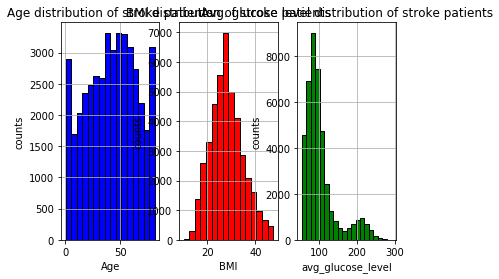

In [13]:
# Histogram: age
plt.subplot(1,3,1)
df_cleaned['age'].hist(bins=16, facecolor = 'blue', edgecolor='black')
plt.title('Age distribution of stroke patients')
plt.xlabel('Age')
plt.ylabel('counts')

# Histogram: bmi
plt.subplot(1,3,2)
df_cleaned['bmi'].hist(bins=16, facecolor = 'red', edgecolor='black')
plt.title('BMI distribution of stroke patients')
plt.xlabel('BMI')
plt.ylabel('counts')

# Histogram: avg_glucose_level
plt.subplot(1,3,3)
df_cleaned['avg_glucose_level'].hist(bins=20, facecolor = 'green', edgecolor='black')
plt.title('Avg. glucose level distribution of stroke patients')
plt.xlabel('avg_glucose_level')
plt.ylabel('counts')
plt.show()

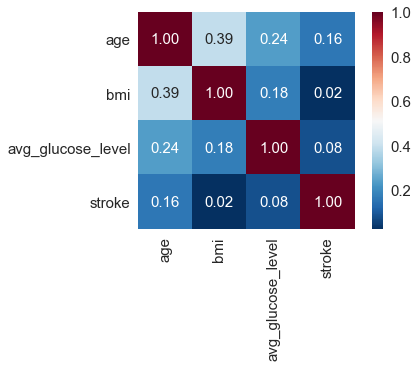

In [14]:
# Correlation Matrix Plot # entire dataset
###############################################################################
# Column names of cleaned dataframe
cols = ['age','bmi','avg_glucose_level','stroke']

# Plot correlation matrix heatmap
cm = np.corrcoef(df_cleaned[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, cmap='RdBu_r', cbar=True,
                 annot=True, square=True, fmt='.2f',
                 annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

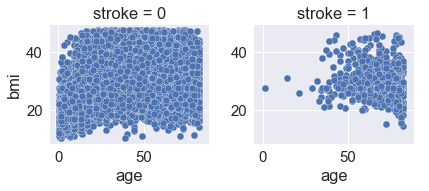

In [15]:
# Scatter Plot # entire dataset
###############################################################################
# Scatter Plot: bmi vs. age on stroke
s1 = sns.FacetGrid(df_cleaned, col='stroke')
s1 = (s1.map(plt.scatter, 'age', 'bmi', edgecolor='white').add_legend())
plt.show()

C:\Users\yoots\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yoots\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


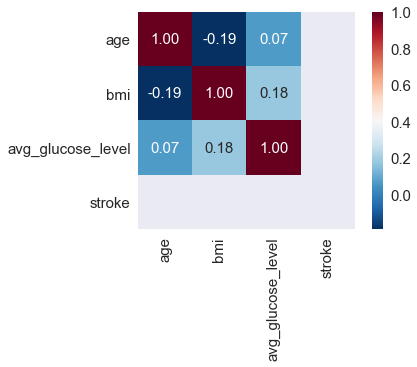

In [16]:
####################################
# EDA on stroke patient cases only #
####################################

# Filtered dataframe with only stroke patient cases #
###############################################################################
df_stroke_0 = df_cleaned[df_cleaned['stroke'] == 0] # only non-stroke patients
df_stroke_1 = df_cleaned[df_cleaned['stroke'] == 1] # only stroke patients

# Extracted columns for correlation matrix plot:
cols = ['age','bmi','avg_glucose_level','stroke']

# Correlation Matrix Plot #
# CM plot of stroke patients only:
cm_stroke = np.corrcoef(df_stroke_1[cols].values.T)
sns.set(font_scale = 1.5)
_ = sns.heatmap(cm_stroke, cmap='RdBu_r', cbar=True,
                annot=True, square=True, fmt='.2f',
                annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

# NOTE: error message disappears when I remove "stroke" from column name list "cols"!

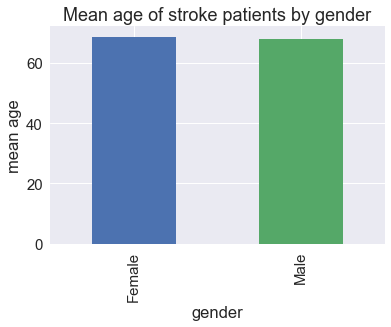

In [17]:
# Bar Charts: mean age of stroke patients by lifestyle factors
# Gender:
df_stroke_1.groupby('gender')['age'].mean().sort_values(ascending=False).plot(kind='bar').set_xlabel('gender')
plt.ylabel('mean age')
plt.title('Mean age of stroke patients by gender')
plt.show()

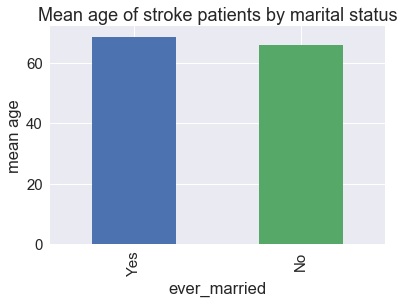

In [18]:
# Marital status:
df_stroke_1.groupby('ever_married')['age'].mean().sort_values(ascending=False).plot(kind='bar').set_xlabel('ever_married')
plt.ylabel('mean age')
plt.title('Mean age of stroke patients by marital status')
plt.show()

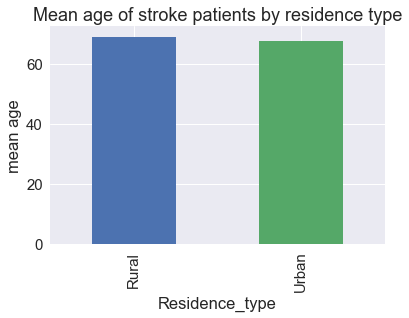

In [19]:
# Residential type:
df_stroke_1.groupby('Residence_type')['age'].mean().sort_values(ascending=False).plot(kind='bar').set_xlabel('Residence_type')
plt.ylabel('mean age')
plt.title('Mean age of stroke patients by residence type')
plt.show()

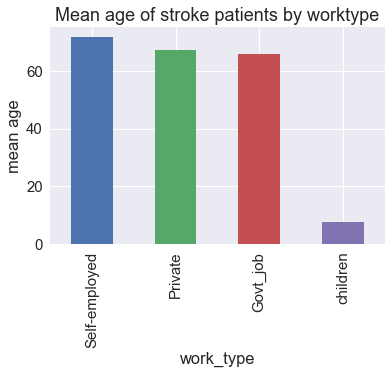

In [20]:
# Work type:
df_stroke_1.groupby('work_type')['age'].mean().sort_values(ascending=False).plot(kind='bar').set_xlabel('work_type')
plt.ylabel('mean age')
plt.title('Mean age of stroke patients by worktype')
plt.show()

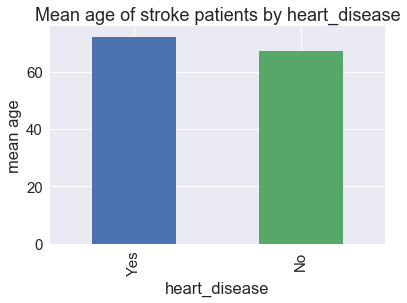

In [21]:
# Bar Charts: mean age of stroke patients by health indicator factors
# heart_disease:
df_stroke_1.groupby('heart_disease')['age'].mean().sort_values(ascending=False).plot(kind='bar').set_xlabel('heart_disease')
plt.ylabel('mean age')
plt.title('Mean age of stroke patients by heart_disease')
plt.show()

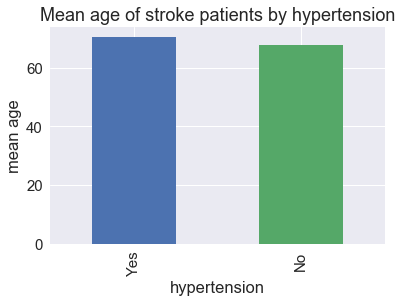

In [22]:
# hypertension:
df_stroke_1.groupby('hypertension')['age'].mean().sort_values(ascending=False).plot(kind='bar').set_xlabel('hypertension')
plt.ylabel('mean age')
plt.title('Mean age of stroke patients by hypertension')
plt.show()

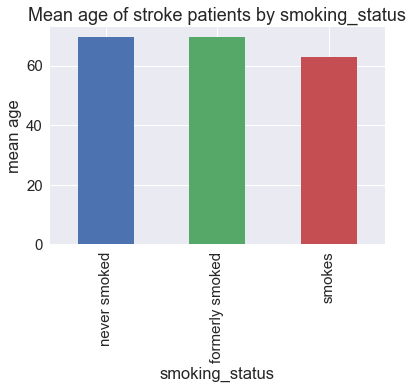

In [23]:
# smoking_status:
df_stroke_1.groupby('smoking_status')['age'].mean().sort_values(ascending=False).plot(kind='bar').set_xlabel('smoking_status')
plt.ylabel('mean age')
plt.title('Mean age of stroke patients by smoking_status')
plt.show()

In [24]:
# Compute summary statistics #
###############################################################################
# Stroke patients only:
df_stroke_1_stat = df_stroke_1.describe().T
# Reorder columns order in summary dataframe
df_stroke_1_stat = df_stroke_1_stat[['count','min','max','mean','25%','50%','75%','std']]
# Drop 'stroke' column:
df_stroke_1_stat = df_stroke_1_stat.drop(['stroke'])
# Print summary stat.:
df_stroke_1_stat

,count,min,max,mean,25%,50%,75%,std
age,772.0,1.32,82.00,68.360518,60.0000,71.00,79.0000,12.179318
avg_glucose_level,772.0,55.01,271.74,129.025946,80.7025,103.64,191.6625,59.505707
bmi,772.0,14.30,46.40,29.168135,26.4000,27.60,31.7000,5.289833


In [25]:
# Non-stroke patients only:
df_stroke_0_stat = df_stroke_0.describe().T
# Reorder columns order in summary dataframe
df_stroke_0_stat = df_stroke_0_stat[['count','min','max','mean','25%','50%','75%','std']]
# Drop 'stroke' column:
df_stroke_0_stat = df_stroke_0_stat.drop(['stroke'])
# Print summary stat.:
df_stroke_0_stat

,count,min,max,mean,25%,50%,75%,std
age,41740.0,0.08,82.00,41.668239,23.00,43.00,59.0000,22.518284
avg_glucose_level,41740.0,55.00,291.05,103.604497,77.47,91.36,111.2425,42.126531
bmi,41740.0,10.10,47.40,28.036100,23.30,27.60,32.2000,6.797340


C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


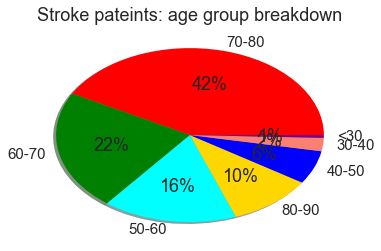

In [26]:
# Feature Engineering: discretization on age for age_group & age_bin_label
###############################################################################
age_bins = [0, 30, 40, 50, 60, 70, 80, 90]
age_bin_labels = [1,2,3,4,5,6,7]

##############################
# Stroke patients population #
##############################
# Generate age_group and age_group_label
df_stroke_1['age_group'] = pd.cut(np.array(df_stroke_1['age']),bins=age_bins) 
df_stroke_1['age_group_label'] = pd.cut(np.array(df_stroke_1['age']),bins=age_bins, labels=age_bin_labels) 

# Stroke patients age group dataframe:
df_grp_age_group_1 = pd.DataFrame(df_stroke_1.groupby('age_group')['age_group'].count().sort_values(ascending=False))
df_grp_age_group_1.columns = ['counts']
df_grp_age_group_1.index.name = 'age_group'
df_grp_age_group_1['pct'] = ((df_grp_age_group_1/df_grp_age_group_1.sum())*100).round(2)

# Plot a pie chart: age group composition on stroke patients
plt.pie(df_grp_age_group_1.loc[:,('counts')], labels=['70-80','60-70','50-60','80-90','40-50','30-40','<30'], 
        autopct='%.0f%%', colors=['red','green','cyan','gold','blue','salmon','purple'], shadow=True)
plt.title('Stroke pateints: age group breakdown')
plt.show()

In [27]:
##################################
# Non-stroke patients population #
##################################
# Generate age_group and age_group_label
df_stroke_0['age_group'] = pd.cut(np.array(df_stroke_0['age']),bins=age_bins) 
df_stroke_0['age_group_label'] = pd.cut(np.array(df_stroke_0['age']),bins=age_bins, labels=age_bin_labels) 
#pd.value_counts(df_stroke_0['age_group']).sort_values()

# Check unique values on age_group, age_group_label #
print(df_stroke_0['age_group'].unique())
print(df_stroke_0['age_group_label'].unique())

[(0, 30], (50, 60], (60, 70], (70, 80], (30, 40], (40, 50], (80, 90]]
Categories (7, interval[int64]): [(0, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]
[1, 4, 5, 6, 2, 3, 7]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]


C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# Stratification on non-stroke patients #
# Stratified by age_group_label:
df_stroke_0_age_grp1 = df_stroke_0[df_stroke_0['age_group_label'] == 1] # age: <30 
df_stroke_0_age_grp2 = df_stroke_0[df_stroke_0['age_group_label'] == 2] # age: 30-40
df_stroke_0_age_grp3 = df_stroke_0[df_stroke_0['age_group_label'] == 3] # age: 40-50
df_stroke_0_age_grp4 = df_stroke_0[df_stroke_0['age_group_label'] == 4] # age: 50-60
df_stroke_0_age_grp5 = df_stroke_0[df_stroke_0['age_group_label'] == 5] # age: 60-70
df_stroke_0_age_grp6 = df_stroke_0[df_stroke_0['age_group_label'] == 6] # age: 70-80
df_stroke_0_age_grp7 = df_stroke_0[df_stroke_0['age_group_label'] == 7] # age: 80-90

df_stroke_1_counts = df_stroke_1[['age_group','age_group_label']]
df_stroke_1_counts = pd.DataFrame(df_stroke_1_counts.groupby('age_group_label')['age_group'].count())
df_stroke_1_counts.columns = ['counts']

# Print the count index for each age group from stroke patients:
print(df_stroke_1_counts)

                 counts
age_group_label        
1                     4
2                    19
3                    48
4                   125
5                   172
6                   325
7                    79


In [29]:
# Import libraries for resample
from sklearn.utils import resample

# Downsampling on non-stroke patients by counts of age_group_label: df_stroke_1_counts
######################################################################################
df_sampled_age_grp1 = resample(df_stroke_0_age_grp1, replace=True, 
                               n_samples=4,random_state=0)
df_sampled_age_grp2 = resample(df_stroke_0_age_grp2, replace=True, 
                               n_samples=19,random_state=0)
df_sampled_age_grp3 = resample(df_stroke_0_age_grp3, replace=True, 
                               n_samples=48,random_state=0)
df_sampled_age_grp4 = resample(df_stroke_0_age_grp4, replace=True, 
                               n_samples=125,random_state=0)
df_sampled_age_grp5 = resample(df_stroke_0_age_grp5, replace=True, 
                               n_samples=172,random_state=0)
df_sampled_age_grp6 = resample(df_stroke_0_age_grp6, replace=True, 
                               n_samples=325,random_state=0)
df_sampled_age_grp7 = resample(df_stroke_0_age_grp7, replace=True, 
                               n_samples=79,random_state=0)

# Concatentate downsampled majority class '0': non-stroke patients
df_stroke_0_downsampled = pd.concat([df_sampled_age_grp1,df_sampled_age_grp2,df_sampled_age_grp3,
                                  df_sampled_age_grp4,df_sampled_age_grp5,df_sampled_age_grp6,
                                  df_sampled_age_grp7], axis=0)

# Conbine minority class '1': stroke patients with downsampled majority class:
df_downsampled = pd.concat([df_stroke_0_downsampled,df_stroke_1],axis=0)

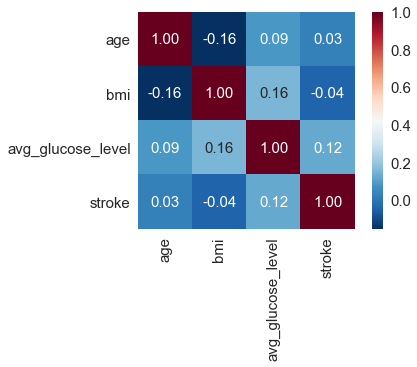

In [30]:
# Correlation Matrix Plot # age stratified downsampled dataset
###############################################################################
# CM plot of downsampled majority: "0" non-stroke patients
cm_downsampled = np.corrcoef(df_downsampled[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm_downsampled, cmap='RdBu_r', cbar=True,
                 annot=True, square=True, fmt='.2f',
                 annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [31]:
# Linear Regression Analysis #
###############################################################################
x_age = df_downsampled['age']
x_bmi = df_downsampled['bmi']

# Compute the covariance matrix:
cov_mat = np.cov(x_age, x_bmi)
# Print covariance matrix:
print(cov_mat)

# Extract covariance of age and bmi cell:
cov_str = cov_mat[0,1] 
# Print the age/avg_glucose_level covariance:
print(cov_str)

# Compue Pearson correlation coefficient:
def pearson_r(x,y):
    """Computer Pearson correlation coefficient between 2 arrays."""
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for age vs. bmi:
r = pearson_r(x_age,x_bmi)
# Print Pearson correlation coefficient:
print(r)

[[ 149.37573262  -10.39021791]
 [ -10.39021791   29.89321138]]
-10.3902179121
-0.155488525564


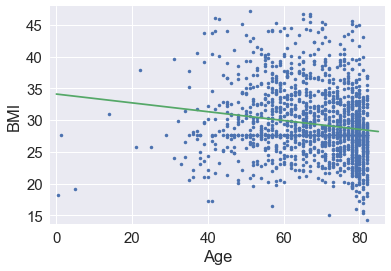

In [32]:
# Linear regression and scatterplot:
# Plot age vs. bmi
_=plt.plot(x_age,x_bmi,marker='.',linestyle='none')
plt.margins(0.02)
_=plt.xlabel('Age')
_=plt.ylabel('BMI')

# Perform a linear regression using np.polyfit():
a,b = np.polyfit(x_age,x_bmi,1)

# Make theoretical line to plot:
x = np.array([0,85]) # theor_age
y = a*x+b # theor_bmi

# Add regression line to plot:
_=plt.plot(x,y)
plt.show()

In [33]:
# Import library for Linear Regression:
import statsmodels.formula.api as sm

# Building Simple Linear Regression Model:
# Indexes: 'age':1, 'glucose':7, 'bmi':8, 'stroke':10
X = df_downsampled.iloc[:, [1,7,8]].values # take age,glucose,bmi columns (matrix)
y = df_downsampled.iloc[:, 10].values # take stroke column (vector)

# Append artificial b0 'constant'
X = np.append(arr = X, values = np.ones((1544,1)).astype(int), axis = 1)  

# Run1: Fit the full model with age, glucose, bmi, constant
X_opt = X[:, [0,1,2,3]] #Specifying the index for matrix
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() #Ordinary Least Square: endox = DV, exog = IVs
regressor_OLS.summary() #Indicates remove x3: bmi, p-value>0.05

# Run2: Fit the full model with age, glucose, constant
X_opt = X[:, [0,1,3]] #Specifying the index for matrix
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() #Ordinary Least Square: endox = DV, exog = IVs
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     12.41
Date:                Fri, 11 May 2018   Prob (F-statistic):           4.52e-06
Time:                        19:52:41   Log-Likelihood:                -1108.3
No. Observations:                1544   AIC:                             2223.
Df Residuals:                    1541   BIC:                             2239.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.001      0.697      0.486      -0.001       0.003
x2             0.0011      0.000      4.852      0.000       0.001       0.002
const          0.3182      0.075      4.270      0.000       0.172       0.464
==============================================================================
Omnibus:                        0.003   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.998   Jarque-Bera (JB):              241.222
Skew:                           0.004   Prob(JB):                     4.16e-53
Kurtosis:                       1.064   Cond. No.                         877.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

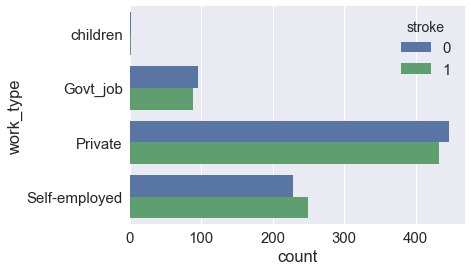

In [34]:
# Bar charts on lifestyle factors on stroke: age stratified downsampled dataset
sns.countplot(y='work_type', hue='stroke', data=df_downsampled)
plt.show()

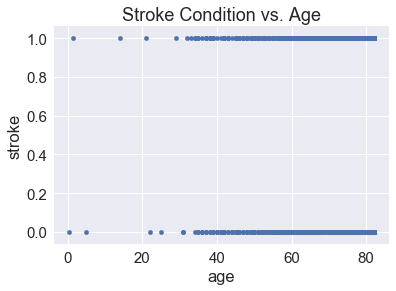

In [35]:
# Scatter Plot: age stratified downsampled dataset
# Stroke vs. Age
df_downsampled.plot(kind='scatter', x='age', y='stroke', linestyle='None')
plt.title('Stroke Condition vs. Age')
plt.show()

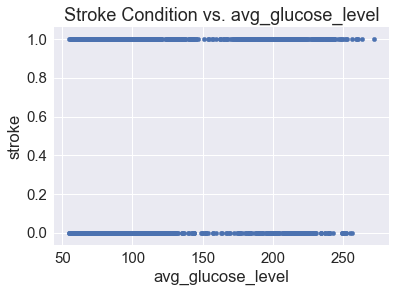

In [36]:
# Stroke vs. avg_glucose_level
df_downsampled.plot(kind='scatter', x='avg_glucose_level', y='stroke', linestyle='None')
plt.title('Stroke Condition vs. avg_glucose_level')
plt.show()

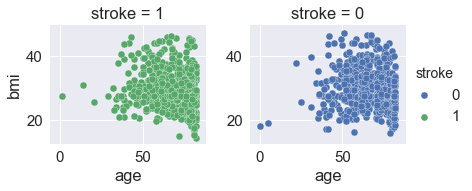

In [37]:
# Faceted Scatter Plot: age stratified downsampled dataset 
# bmi vs. age by stroke 
_ = sns.FacetGrid(df_downsampled, col='stroke', hue='stroke', col_order=[1,0])
_ = (_.map(plt.scatter, 'age', 'bmi', edgecolor='white').add_legend())
plt.show()

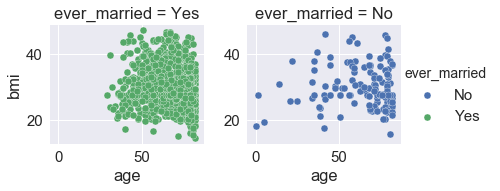

In [38]:
# bmi vs. age by marital_status 
_ = sns.FacetGrid(df_downsampled, col='ever_married', hue='ever_married', col_order=['Yes','No'], hue_order=['No','Yes'])
_ = (_.map(plt.scatter, 'age', 'bmi', edgecolor='white').add_legend())
plt.show()

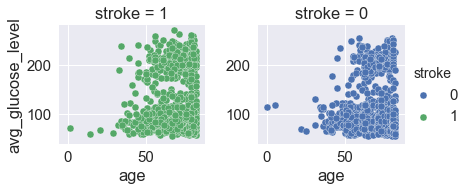

In [39]:
# avg_glucose_level vs. age by stroke
_ = sns.FacetGrid(df_downsampled, col='stroke', hue='stroke', col_order=[1,0])
_ = (_.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='white').add_legend())
plt.show()

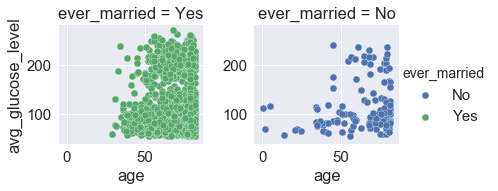

In [40]:
# avg_glucose_level vs. age by marital_status
_ = sns.FacetGrid(df_downsampled, col='ever_married', hue='ever_married', col_order=['Yes','No'], hue_order=['No','Yes'])
_ = (_.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='white').add_legend())
plt.show()